# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
data.keys()

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicatessen'],
      dtype='object')

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4,200,358]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,3067,13240,23127,3941,9959,731
2,759,18664,1660,6114,536,4100


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
0. This customer spent most of the money on **Fresh (22,615)** which is higher than 75% customers. In addition, the spending on **Delicatessen (5,185)** is also higher than 75% customers. Therefore, I would assume it is the place like a **(super) market**.  
1. For this customer, the majority of spending is on **Grocery (23,127)** and **Detergents_Paper (9,959)**   which both are higher than 75% customers. Thus, establishment could be a **grocery store**.
2. Annual spending of this customer on **Milk** is **18,664** (higher than 75% customers) which is much higher than the spending on the other cateogries. This customer might be an **ice cream store**.  


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data , data['Milk'], test_size = 0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

In [6]:
print score

0.156275395017


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I choose **Milk** feature to be predicted, and the prediction score on the testing data is about 0.156. The score implies that only 15.6% of total variation of 'annual spending on Milk' can be explained by this regression model. Since the score of $R^2$ is relatively low, it may possess certain prediction power but may not be necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

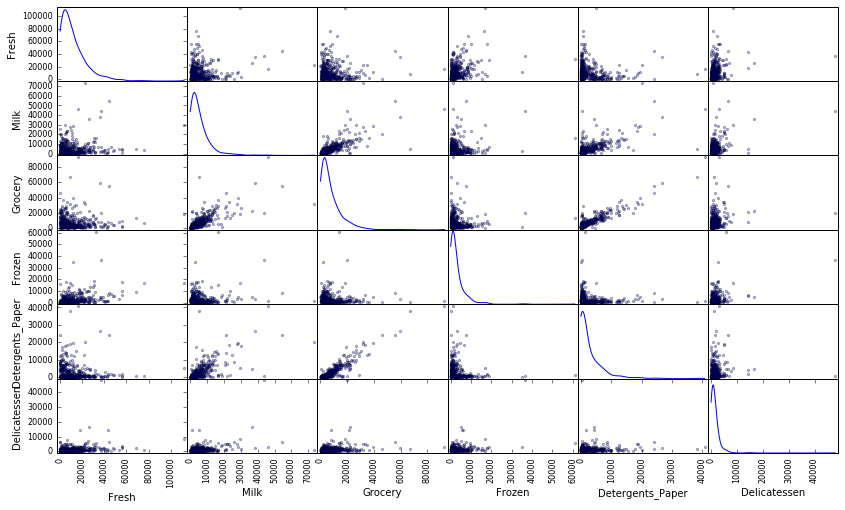

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There are three pairs of features which exhibit some degree of correlation (positively correlated), including (Milk-Grocery), (Milk-Detergents_Paper), and (Grocery-Detergents_Paper). The correlations between Milk-Grocery and Milk-Detergents_Paper (identified in the graph) may explain why the regression model has certain prediction power. However, the rest of categories seem to have no correlation with Milk, which make less or no contribution on predicting spending on Milk. Therefore, the $R^2$ score of this regression model is the relative low (0.156).

In order to have the better understanding about the data, visualization is a feasible approach. With [parallel coordinate](https://en.wikipedia.org/wiki/Parallel_coordinates), we are able to obtain a overview about the dataset.  In the parallel coordinate, each customer is displayed as a polyline, and each horizontal axis represents a feature. In addition, How individual feature distributed can be observed using [histograms](https://en.wikipedia.org/wiki/Histogram) and [boxplots](https://en.wikipedia.org/wiki/Box_plot). As shown in the histograms (see below), the distributions are not normally distributed (right skewed). From the boxplot, we observe that most of spendings are under 20,000 on **Fresh**, 8,000 on **Milk**, 10,000 on **Grocery**, 5,000 on **Frozen** and **Detergents_Paper**, and 2,000 on **Delicatessen**.

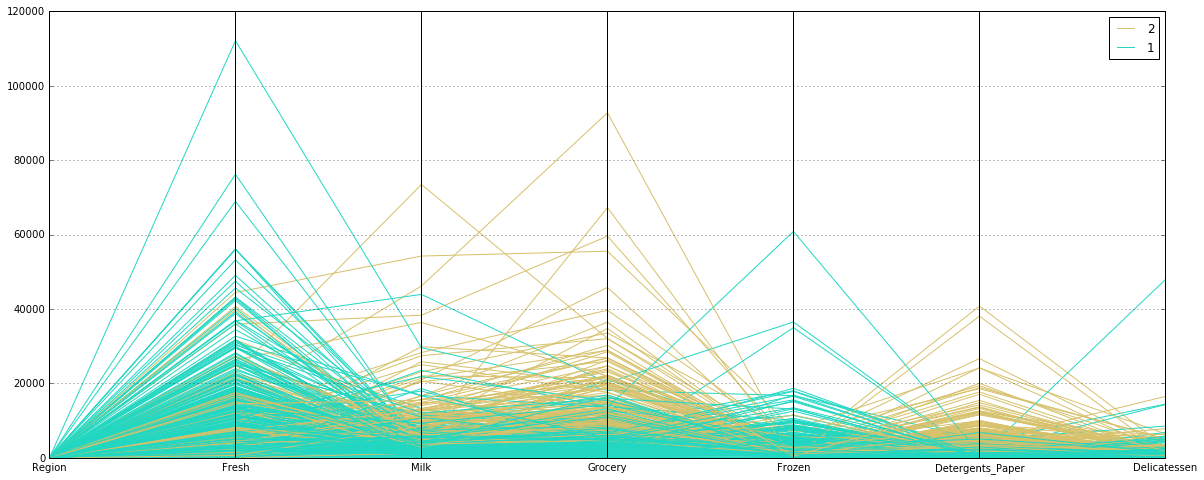

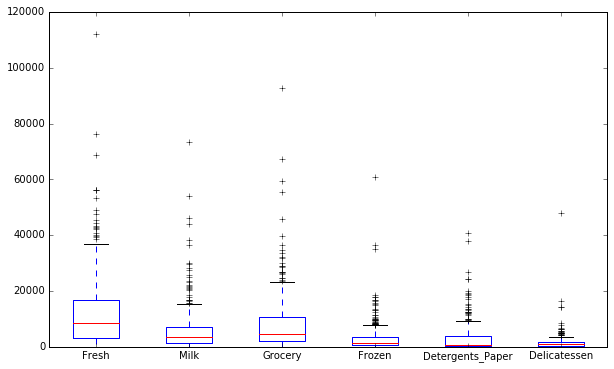

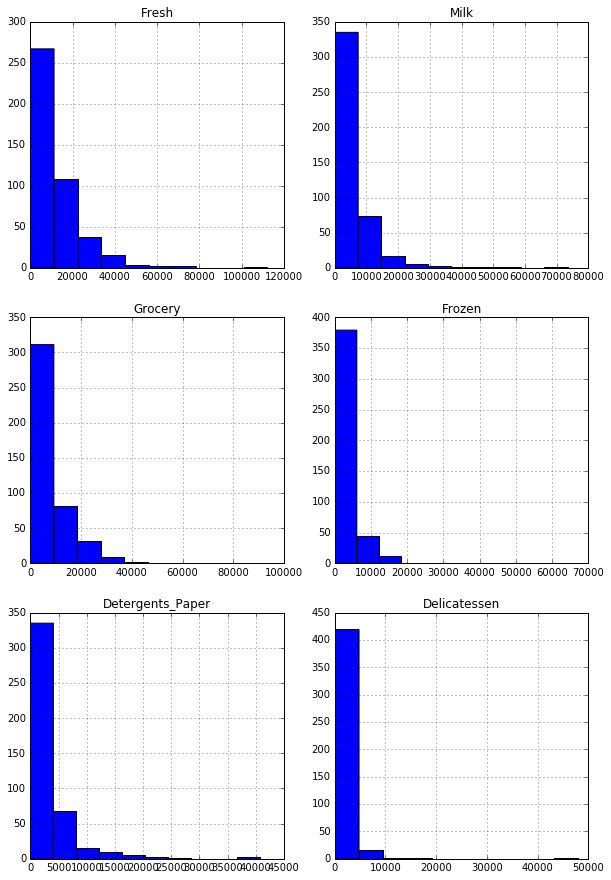

In [8]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

full_data = pd.read_csv("customers.csv")

# show parallel coordinate for a overivew on all feature distributions
plt.figure(figsize=(20,8))
parallel_coordinates(full_data, 'Channel')
plt.show()

# show boxplot that shows first, second (median), third quartiles, and outliers  of each feature
data.plot(kind='box', figsize=(10,6))

# show histogram of individual feature for a detail view on each feature distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
data['Fresh'].hist(ax=axes[0,0])
axes[0,0].set_title('Fresh')
data['Milk'].hist(ax=axes[0,1])
axes[0,1].set_title('Milk')
data['Grocery'].hist(ax=axes[1,0])
axes[1,0].set_title('Grocery')
data['Frozen'].hist(ax=axes[1,1])
axes[1,1].set_title('Frozen')
data['Detergents_Paper'].hist(ax=axes[2,0])
axes[2,0].set_title('Detergents_Paper')
data['Delicatessen'].hist(ax=axes[2,1])
axes[2,1].set_title('Delicatessen')


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

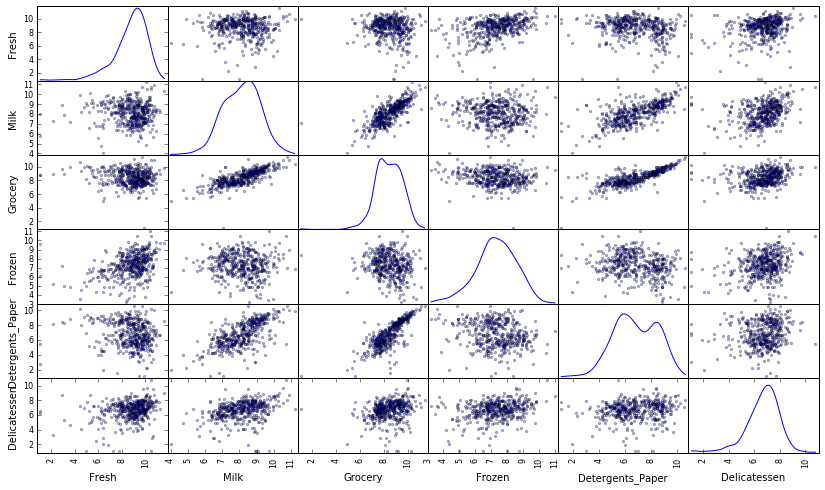

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,6.632002,9.834352,7.414573,8.718337,6.284134,8.318742


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = set()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    print "Q1:{}, Q3:{}, step:{}".format(Q1, Q3, step)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # add indexes of outliers into the outliers list
    for ind in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values:
        outliers.add(ind)
            
outliers = sorted(list(outliers))  
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Q1:8.04805870221, Q3:9.73706394795, step:2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Q1:7.33498124004, Q3:8.88048008859, step:2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Q1:7.67461620137, Q3:9.27385367724, step:2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Q1:6.60967774917, Q3:8.17589608318, step:2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Q1:5.54810142479, Q3:8.27434059875, step:4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Q1:6.01187465693, Q3:7.50672842655, step:2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [12]:
# show all data points are considered as outliers
print outliers

[38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there are data points considered outliers more than one feature, take following data points as the examples:
1. the data point with **index 154** has three features are considered as outliers, including **Milk**, **Grocery**, and **Delicatessen**.
2. the data point with **index 65** has two features are considered as outliers, including **Fresh** and **Frozen**
3. the data point with **index 66** has two features are considered as outliers, including **Fresh** and **Delicatessen**
4. the data point with **index 75** has twofeatures are considered as outliers, including **Grocery** and **Detergents_Paper**

Whether the outliers should be removed from the dataset can be discussed from two perspectives, 

1.**What cause the outlier?** : If the outlier appears because of some errors (e.x., sensor error, system error, encoding error, etc.), then those outliers should be excluded. For another consideration, take Kenneth Lay (the CEO) in Enron company as an example whose salary can be considered as an outlier while analyzing the salary of employees in Enron.  However, we may not want to remove the Kenneth Lay from the employees in this case since he is the most important person in this company. In such scenario, removing the outliers implies certain information is also eradicated.

2.**What is the task?** : Whether the outliers should be removed may also depends on the task need to be performed. For the second case mentioned above, if we want to train a regression model for predicting salary of employees in Enron company, then remove Kenneth Lay may be helpful to reduce the mean squared error (MSE) and/or increase the score of $R^2$ of the model (because the existence of Kenneth Lay could affect the regression model significantly). In addition, for the data clustering task (e.x., K-means clustering), the outliers may also affect the result of clustering considerably. For example, the outliers can influence the location/position of cluster centers significantly, resulting in an undesired result of clustering. 

I decide to add the detected outliers into the outliers list since those outliers have the potential negative effects on future clustering tasks.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

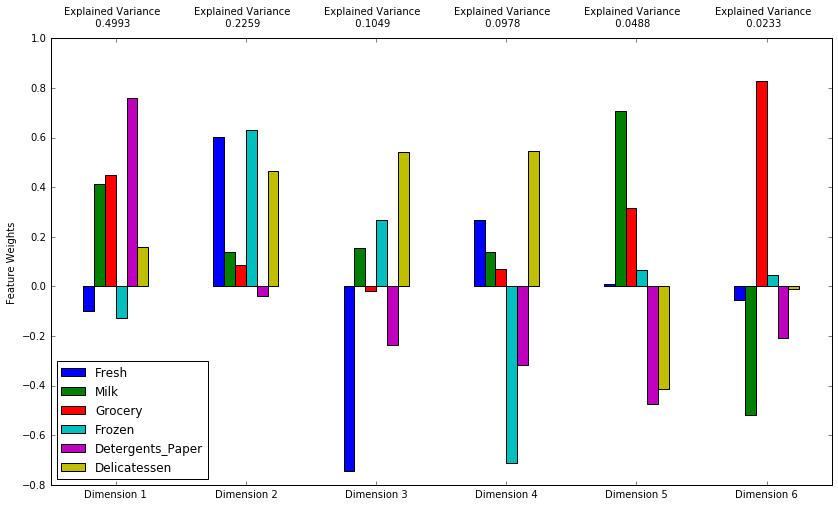

In [13]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca =  PCA(n_components= len(data.columns))
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [14]:
# show informatin of principal components
print pca.components_
print pca.explained_variance_ratio_

[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [-0.74520543  0.15440822 -0.02038937  0.26695167 -0.23485013  0.54221164]
 [ 0.26670888  0.13749532  0.0709773  -0.71328102 -0.31568384  0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [-0.05428877 -0.51774387  0.82668599  0.04707807 -0.20803866 -0.00937317]]
[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The total variance in the data can be explained by the first and second principal component is **0.7252** (0.4993+0.2259). The total variance is explained by the first four principal component is **0.9279** (0.4993+0.2259+0.1049+0.0978).

How features weighted in a principal component can be used to interpret the correlations between features and the component. As stated in [Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54), *Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction.*

1. For the first component, it is obvious that **Milk, Grocery, and Detergents_Paper** are positively correlated with the component (especially for Detergents_Paper). In addition, when the values of one of these features increase, the remaining ones tend to increase as well. 
2. For the second component, which condition is differed from the first component. **Fresh, Frozen, and Delicatessen** has the apparent positive correlation with the component. (Certain orthonormality could be observed between first two components)
3. For the third component, we notice that **Fresh** is negatively correlated with this component, but **Delicatessen** has the positive correlation.
4. For the four component, **Frozen** has negative correlation with the component while **Delicatessen** is positive correlated.

When describe the features in the first four components, I skipped the features with relatively lower weights (which are not closely associated with the component, comparing to the ones with higher weights).


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.9938,2.0783,0.2614,0.5228,-0.4987,-0.0438
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,0.1676,0.3008,3.2852,-0.3838,0.5683,-1.4409


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.9938,2.0783
1,3.0820,0.1314
2,0.1676,0.3008


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

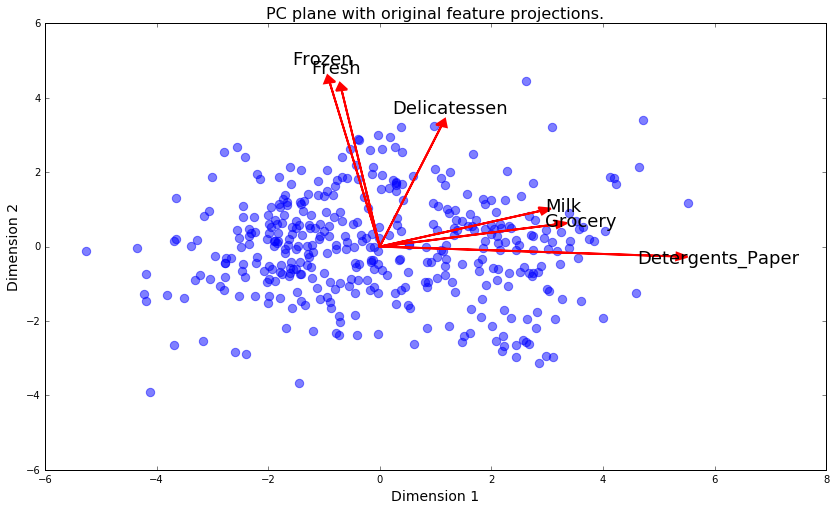

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**

**Milk, Grocery, and Detergents_Paper** are most strongly correlated with the first component. **Fresh, Frozen, and Delicatessen** are associated with the second component. I would consider the observations **agree** with the pca_results plot obtained earlier. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
The main difference between these two algorithm is that K-Means clustering is a hard clustering method and Gaussian Mixture Model is a soft clustering method. For hard clustering, each data point is assigned to "one" cluster. However, each data point can have certain probability to be assigned to all of the clusters. 

1. **K-Means clustering algorithm**: K-Means clustering is one of the most widely used clustering method. K-Means is easy to understand, simple to implement (in both sequential or parallel), and less computationally intensive comparing to other clustering algorithms (e.x., hierarchical clustering). There are also disadvantages of K-Means clustering such as it can only find the local minimum. Therefore, a good initialization for cluster centers is important. In addition, the result of K-means can easily affected by outliers as well as the scale of features. Furthermore, K-Means clustering could have poor performances when there are overlapping between clusters.

2. **Gaussian Mixture Model (GMM) clustering algorithm**: GMM is a probabilistic model that exploits Expectation–maximization (EM) algorithm to estimate a finite number of Gaussian distributions that best describe how input data points are generated. Comparing to K-Means, GMM is a more flexible model.  K-Means can be considered as a special case of GMM where the covariance matrix is a diagonal matrix and elements on the diagonal are equal (no correlation between any two features). (see the left covariance in graph below for the example) For typical K-Means method, each feature has the same contribution (weight) for estimating the distance to a cluster (can only be used to detect spherical cluster). However, GMM has the capability to detect the clusters in different shapes, orientations, and sizes. (see right covariance structure in the graph below) In addition, for the data points which are difficult to be assigned to a cluster (e.x., the ones with high uncertainty), it is better to give the probability for cluster assignments (soft clustering) rather than arbitrarily assign the point to a cluster (hard clustering).  

Because of the flexibility offered by Gaussian Mixture Model, I will choose GMM for the data clustering task.

The figure is from the [slide](https://www.coursera.org/learn/ml-clustering-and-retrieval/lecture/1BBlC/mixture-of-gaussians) of Machine Learning: Clustering & Retrieval course on Coursera
<img src="Covariance.jpg" width =400 height = 400>

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Evaluate the number of clusters using silhouette_score from 2 to 15 clusters.
silhouette_scores = []
bic_scores = []
for i in xrange(1,15):
    # TODO: Apply your clustering algorithm of choice to the reduced data
    clusterer = GaussianMixture(n_components=i+1, random_state=42)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    silhouette_scores.append(score)
    bic_scores.append(clusterer.bic(reduced_data))
print "The silhouette score for GMM with n_components=2 is {}".format(score)
print "The BIC score for GMM with n_components=2 is {}".format(clusterer.bic(reduced_data))

The silhouette score for GMM with n_components=2 is 0.336289619761
The BIC score for GMM with n_components=2 is 3416.63184706


In [20]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_ 

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [21]:
# the silhouette_scores from cluster numbers 2-15.
print silhouette_scores

[0.44741199557091149, 0.36119362503867258, 0.31825345740294686, 0.31305656517669961, 0.34060371638167092, 0.32966078194917359, 0.32912206779523534, 0.26268469497827368, 0.29957956719713591, 0.30398351033213067, 0.31080694695353728, 0.26937771046240799, 0.33737161783192743, 0.3362896197611604]


**Answer:**

I tested the cluster numbers from 2 to 15, the range of silhouette scores is from 0.262 (n_components=9) to 0447(n_components=2). (see graph below)

As the graph shown below, when **n_components=2**, we have the best (highest) silhouette score (**0.447**). In addition, [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (BIC), a criterion for model selection can also be applied to select the number of clusters (the lower the better). From the evaluation, we also acquire the lowest BIC score (**3075.26**) when **n_components=2**.

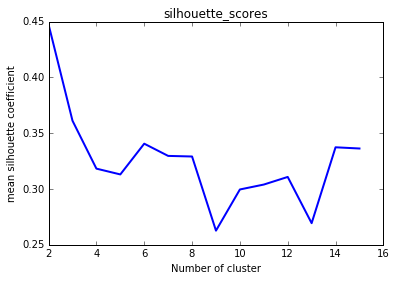

In [22]:
# plot silhouette_score with different number of clusters
x = np.arange(2, 16)
plt.plot(x, silhouette_scores, '-', linewidth=2)
plt.title('silhouette_scores')
plt.xlabel('Number of cluster')
plt.ylabel('mean silhouette coefficient')

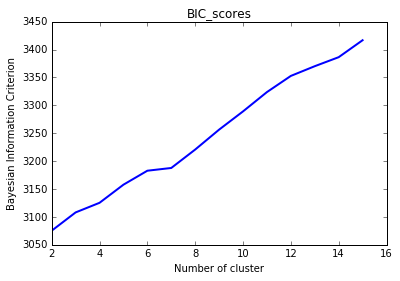

In [23]:
# plot Bayesian information criterion (BIC) score with different number of clusters
x = np.arange(2, 16)
plt.plot(x, bic_scores, '-', linewidth=2)
plt.title('BIC_scores')
plt.xlabel('Number of cluster')
plt.ylabel('Bayesian Information Criterion')

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

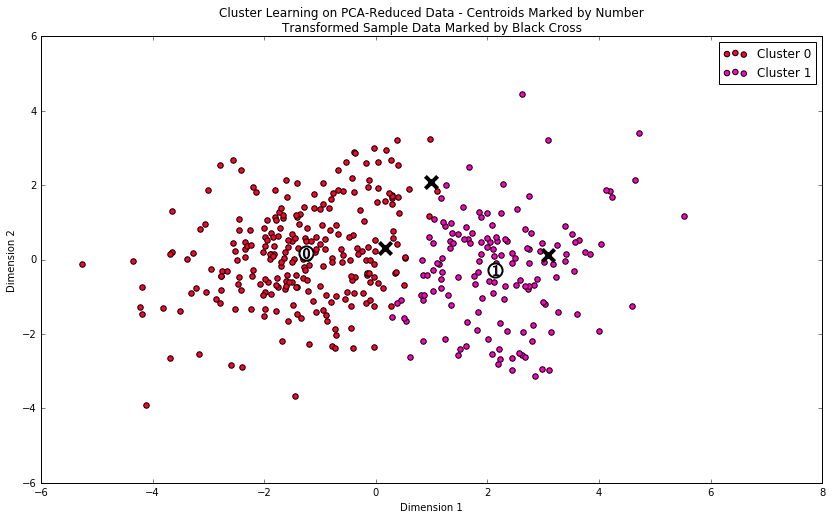

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers =  np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468,2067,2624,2196,343,799
Segment 1,5174,7776,11581,1068,4536,1101


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
1. **customer segments 0**: has the annual spending on **Fresh** (9468) and **Frozen** (5174) that are greater than 50% of customers (8504 and 1526 respectively). Therefore, this customer segments could represent a **(super) market**. 

2. **customer segments 1**: has the annual spending on **Milk** (7776), **Grocery** (11581), and **Detergents_Paper** (4563) that are greater than the 75% of customers (7190, 10655, and 3922 respectively). Additionally, the spending on **Delicatessen** (1101) is also great than 50% of customers (965) Therefore, this customer segments could represent a **grocery store**. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
In Question 8, I consider customer segments 0 represents **(super) market**, and customer segments 1 represents **grocery store**. In Question 1, I predict sample point 0 is a (super) market and  sample point 1 is a grocery store, which are consistent with the customer segments. 

However, I predict sample point 2 as a ice cream store, which is assigned to (super) market. The assignment implies that the spending behavior of sample point 2 is more close to a (super) market than a grocery store.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
First, we should clarify the definition of a positive react from a customer? Does a positive react implies the increase of annual spending? Does the distributor conduct a survey or an interview with the customers for the feedback on the change? For simplicity, I would recommend the distributor to conduct a survey that ask customers two questions: 1. Please state your level of satisfaction with current delivery service (5 days a week). 2. Please state your level of satisfaction with new delivery service (3 days a week), if the delivery service is changed from currently 5 days a week to 3 days a week. The possible responses can be *Very Dissatisfied*, *Dissatisfied*, *OK*, *Satisfied*, 8Very Satisfied*, numbering 1 to 5 as an interval scale.  

### Experiment Design:
1.**Comparison within a group**: To evaluate customer would react positively to the change in delivery service in each group, we can randomly select customers from each group. For example, we randomly choose 100 customers from each group, and ask for their responses on current delivery service and new delivery service (as the survey mentioned above). We can then conduct the dependent t-test (one-tailed test) on the responses from both groups with the following hypothesis test. Two t-tests will be conducted, one for responses from customer segment 0 and the other for responses from customer segment 1. If we choose a significance level of 0.05, and the null hypothesis is rejected. We can say "we are 95% confident that customers in this segment have positive responses for the new delivery service." In addition, it implies that there is a statistically significant difference (with $\alpha$=0.05).

Hypothesis test for comparison within a group:

$H_0: \mu_{new} \leq \mu_{old} $,  
$H_A: \mu_{new} > \mu_{old} $


2.**Comparison between groups**: Besides of analyzing the how customers react to the change in delivery service within a group, we may also study whether the impact of service change is the same in two groups. We first calculate the difference of responses in each group (satisfaction of new service - satisfaction of current service), and utilize these values for a two sample t-test with the following hypothesis test. If null hypothesis is rejected, it means how customers in two groups respond to the new service is significantly different. 

Hypothesis test for comparison between two groups:

$H_0: \mu_{seg\_0} = \mu_{seg\_1} $,  
$H_A: \mu_{seg\_0} \neq \mu_{seg\_1} $


For two sample t-test: [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test), a popular two sample t-test can be applied to analyze the positive reacts of two group of customers is statistically significant. Unlike the [Student's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test), Welch's t-test make less assumption (no need for two sample sets to have equal variances and sizes), making it a more flexible and robust approach. However, the assumption of normal distributed data is still retained. Based on the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), if we have sample size more than 30, we may assume the samples is normally distributed. 


### Discussion:
Two analyses could be conducted to answer the question. First, dependent t-test is conducted in each group to identify whether customers in a group have the positive response to change of delivery service. If null hypothesis is reject, we are more confident to say that customers have the positive response to the change. Second, two sample t-test is conducted to evaluate if the affect of service change in two groups is statistically different. If the null hypothesis is rejected, we can assume there is a statistically significant difference between two groups on the impact of service change. (If the null hypotheses is not rejected, it means there is no statistically significant difference.)


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use **customer segment** of the original customers as the **target feature**, meaning there are two class labels (0 and 1). We can then exploit the records of original customers as the input data for training a binary classifier to predict the customer segments of new customers. Since there is no categorical features in the data (no encoding is required), we can rescale the features using sklearn [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for data preprocessing (we may also remove the outliers). For choosing an algorithm, I would recommend k-nearest neighbors (K-NN) (a [lazy learning](https://en.wikipedia.org/wiki/Lazy_learning) method) for this task, which needs no training process before making a prediction. In addition, the dimension of the data records is relatively low (6 features), making the computation of the distance of neighbors less intensive. If only ten customers need to be predicted, it is more efficient to use K-NN. However, if more and more customers need to be predicted in the future, [active learning](https://en.wikipedia.org/wiki/Active_learning) approaches such as Random Forest and SVM would be the better option. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

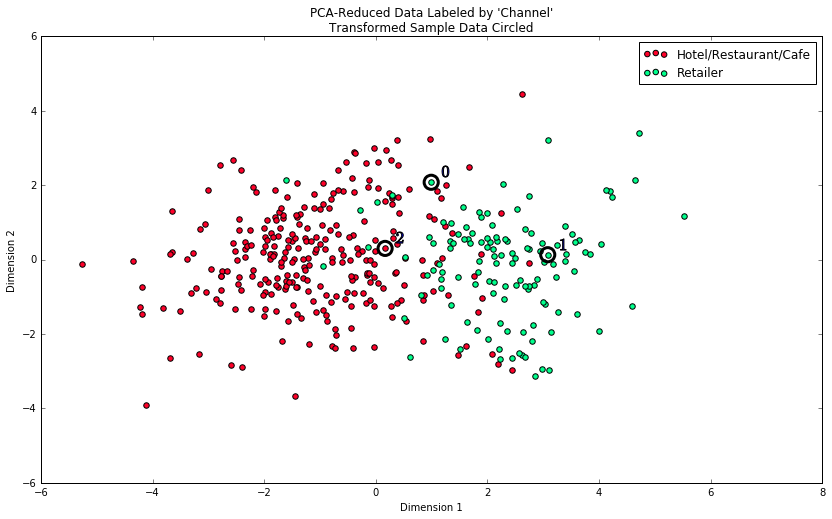

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

In [28]:
from sklearn.metrics import accuracy_score
channel = full_data['Channel']
channel = channel.drop(channel.index[outliers]).reset_index(drop = True)

# count number of customers are assigned to each segment
num_segment0 = sum(1 for x in preds if x==0)
num_segment1 = sum(1 for x in preds if x==1)
# count number of customers in each channel
num_channel1 = sum(1 for x in channel if x==1)
num_channel2 = sum(1 for x in channel if x==2)

# print the information for predicted customer segments
print "{} customers are assigned to segment_0, {} customers are assigned to segment_1"\
    .format(num_segment0, num_segment1)

# print the information for predicted customer segments
print "{} customers are in channel_1, {} customers are in channel_2"\
    .format(num_channel1, num_channel2)    

# Change values 1, 2 in channels to 0, 1.   
new_channel = channel-1

# print the percentage of customer_segment match channel.
print "{} customer_segment matches channel".format(accuracy_score(new_channel, preds))

251 customers are assigned to segment_0, 147 customers are assigned to segment_1
274 customers are in channel_1, 124 customers are in channel_2
0.902010050251 customer_segment matches channel


**Answer:**
There are two types of channel in the data records, including Hotel/Restaurant/Cafe customers and Retailer customers. In the previous task, I also select 2 clusters based on the silhouette score and BIC score. For the algorithm (GMM) I choose, 90 % of the result of clustering match the channel feature (see analysis above). Therefore, I would consider the classifications are consistent with the previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.